In [3]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.9.1


In [20]:
import numpy as np

loaded_data = np.loadtxt('data/diabetes.csv', delimiter=',')

# 학습데이터 분리
seperation_rate=0.3 #분리 비율
test_data_num = int(len(loaded_data)*seperation_rate)

np.random.shuffle(loaded_data)

test_data = loaded_data[0:test_data_num]
training_data = loaded_data[test_data_num:]

#학습할 x 데이터, 학습할 t 데이터
training_x_data = training_data[:,0:-1] #맨 마지막 필드 빼고 전부다
training_t_data = training_data[:,[-1]] #맨 마지막 필드

# 테스트할 x 데이터, 테스트할 t 데이터
test_x_data = test_data[:,0:-1]
test_t_data = test_data[:,[-1]]


print('loaded_data.shape=',loaded_data.shape)
print('training_x_data.shape=',training_x_data.shape)
print('training_t_data.shape=',training_t_data.shape)

print('test_x_data.shape=',test_x_data.shape)
print('test_t_data.shape=',test_t_data.shape)

loaded_data.shape= (759, 9)
training_x_data.shape= (532, 8)
training_t_data.shape= (532, 1)
test_x_data.shape= (227, 8)
test_t_data.shape= (227, 1)


In [21]:
#logistic Regression을 keras 이용하여 생성

model = Sequential()

#노드 1개인 출력층 생성
model.add(Dense(training_t_data.shape[1],
                input_shape=(training_x_data.shape[1],),
                activation='sigmoid'))

In [22]:
model.compile(optimizer=SGD(learning_rate=0.01), #확률 그라디언트 디센트
              loss='binary_crossentropy', # 분류하는 값이 2개 이루어져 있음, 분류값 설정
              metrics=['accuracy']) # 매트릭스 정확도
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [23]:
from datetime import datetime

start_time = datetime.now()

hist=model.fit(training_x_data, training_t_data,epochs=500, validation_split=0.2, verbose=1)
# verbose mode
# 0 : silent
# 1 : progress bar
# 2 : one line per epoch
end_time=datetime.now()

print('\nElapsed Time:::',end_time-start_time)

Epoch 1/500
14/14 [==============================] - 1s 13ms/step - loss: 0.6811 - accuracy: 0.5694 - val_loss: 0.6680 - val_accuracy: 0.5794
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6686 - accuracy: 0.6259 - val_loss: 0.6587 - val_accuracy: 0.6262
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.6824 - val_loss: 0.6511 - val_accuracy: 0.6449
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6488 - accuracy: 0.6847 - val_loss: 0.6437 - val_accuracy: 0.6822
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6400 - accuracy: 0.6965 - val_loss: 0.6374 - val_accuracy: 0.7196
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6325 - accuracy: 0.6941 - val_loss: 0.6322 - val_accuracy: 0.7009
Epoch 7/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6261 - accuracy: 0.6918 - val_loss: 0.6277 - val_accuracy: 0.6729
Epoch 8/500


In [24]:
model.evaluate(test_x_data,test_t_data)

8/8 [==============================] - 0s 1ms/step - loss: 0.5701 - accuracy: 0.6960


[0.570112407207489, 0.6960352659225464]

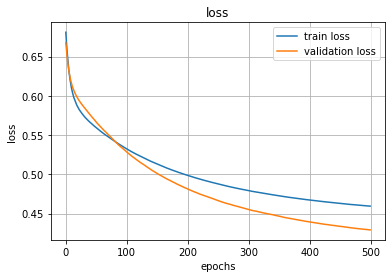

In [26]:
import matplotlib.pyplot as plt

plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')

plt.legend(loc='best')
plt.show()

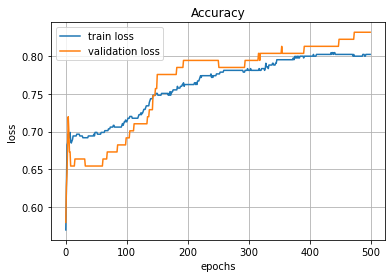

In [27]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['accuracy'], label='train loss')
plt.plot(hist.history['val_accuracy'],label='validation loss')

plt.legend(loc='best')
plt.show()